In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

df1 = pd.read_csv("vgsales.csv")

df1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
df1.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [3]:
df1.isnull().sum(axis = 0)
df1 = df1.dropna()
df1.isnull().sum(axis = 0)
df1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
df1.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


From average of 0.54 of global sales some insights we can see are:
NA leads video game sales followed by EU then Japan. NA accounts for almost half of video game sales from both mean and medium.
Average year 2006 with median of 2007 means skewed to the left. Spams 1980 to 2020.
Large standard diviation relitive to the mean means large variation between the sales of video games. Some sell well while others poorly

Looking at rank of the head() Wii sports is ranked first and is more than twice the sales as the second best seller (Super Mario Bros.) 

In [5]:
df1["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [6]:
df1["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [7]:
df1["Genre"].value_counts()

Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64

### Keep only rows platforms with more than N entries

In [8]:
filtered_df1 = df1.groupby('Platform').filter(lambda x: len(x) >= 100)
filtered_df1["Platform"].value_counts()

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
Name: count, dtype: int64

### Create ranks for each column

In [9]:
filtered_df1.drop("Rank", axis=1, inplace = True)
filtered_df1["Global_Rank"] = filtered_df1["Global_Sales"].rank(ascending=False, method = "first").astype(int)
filtered_df1["NA_Rank"] = filtered_df1["NA_Sales"].rank(ascending=False, method = "first").astype(int)
filtered_df1["EU_Rank"] = filtered_df1["EU_Sales"].rank(ascending=False, method = "first").astype(int)
filtered_df1["JP_Rank"] = filtered_df1["JP_Sales"].rank(ascending=False, method = "first").astype(int)
filtered_df1["Other_Rank"] = filtered_df1["Other_Sales"].rank(ascending=False, method = "first").astype(int)
filtered_df1.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Global_Rank,NA_Rank,EU_Rank,JP_Rank,Other_Rank
count,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000
mean,2006.651820,0.254120,0.145781,0.067911,0.048432,0.516520,7993.500000,7993.500000,7993.500000,7993.500000,7993.500000
std,5.551973,0.720121,0.502205,0.268675,0.190760,1.453713,4614.905037,4614.905037,4614.905037,4614.905037,4614.905037
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,3997.250000,3997.250000,3997.250000,3997.250000,3997.250000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,7993.500000,7993.500000,7993.500000,7993.500000,7993.500000
75%,2010.000000,0.240000,0.110000,0.030000,0.040000,0.460000,11989.750000,11989.750000,11989.750000,11989.750000,11989.750000
max,2020.000000,41.490000,29.020000,6.500000,10.570000,82.740000,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000


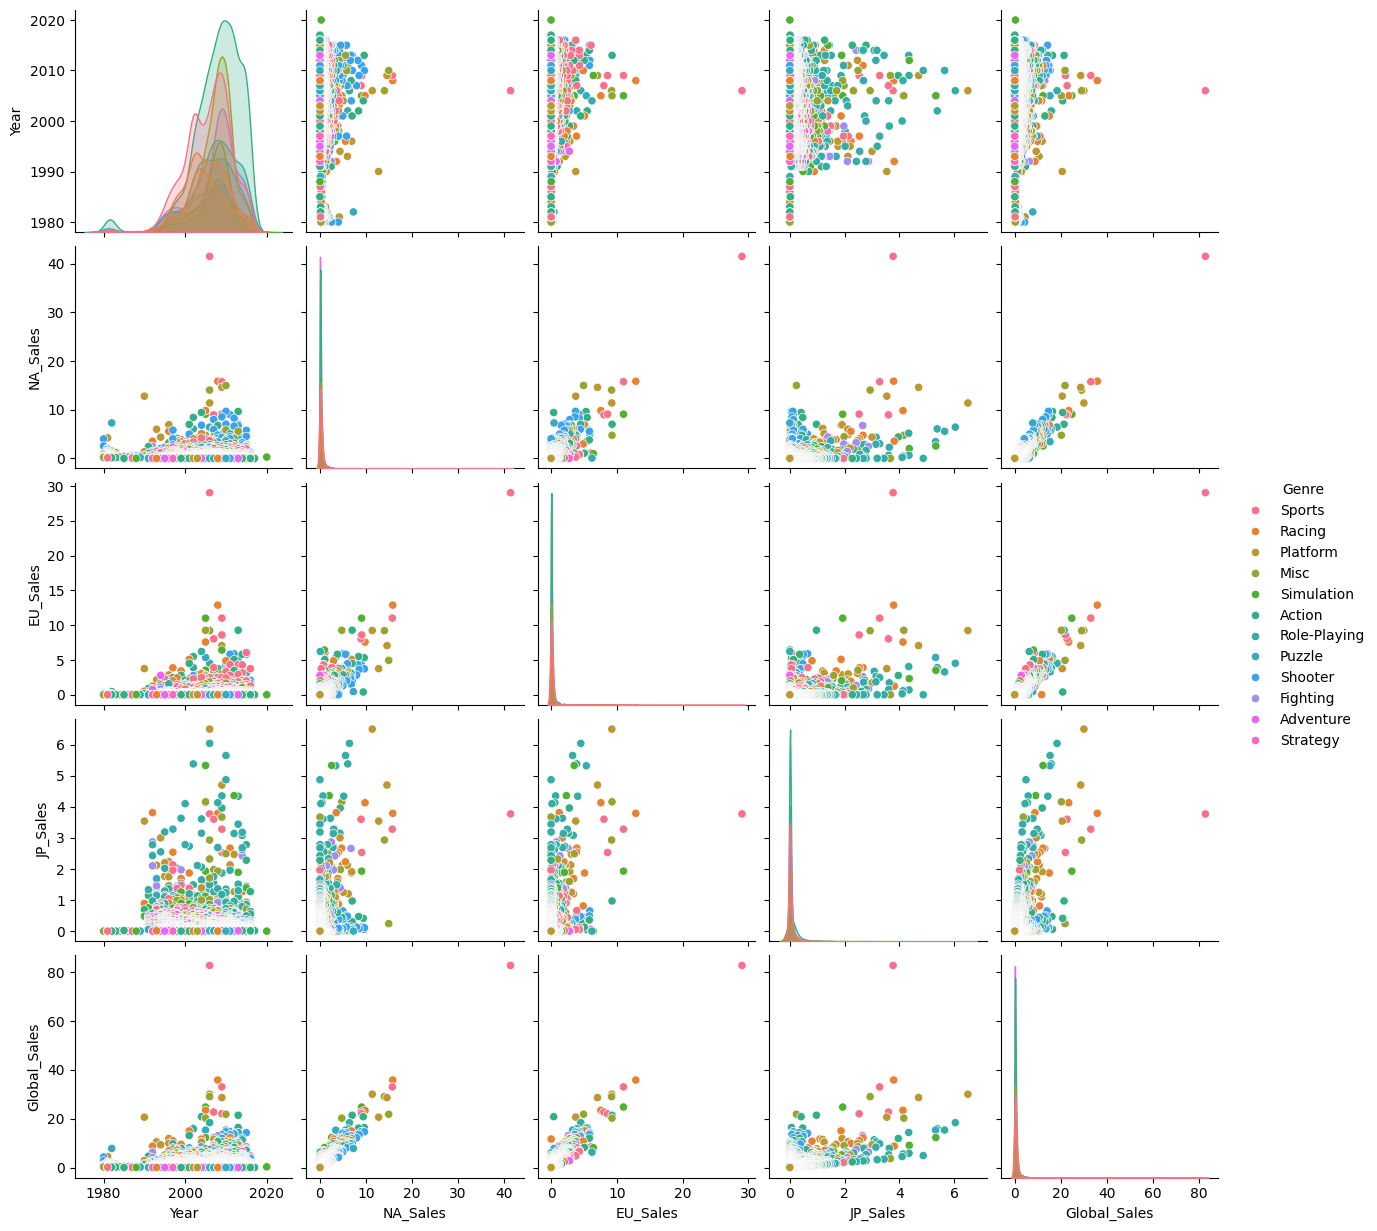

In [10]:
sns.pairplot(filtered_df1[['Year', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales', 'Platform']], hue = "Genre")

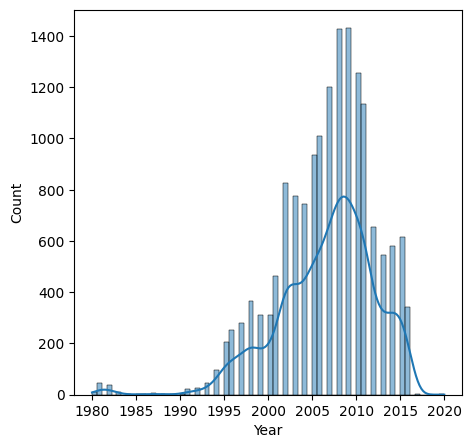

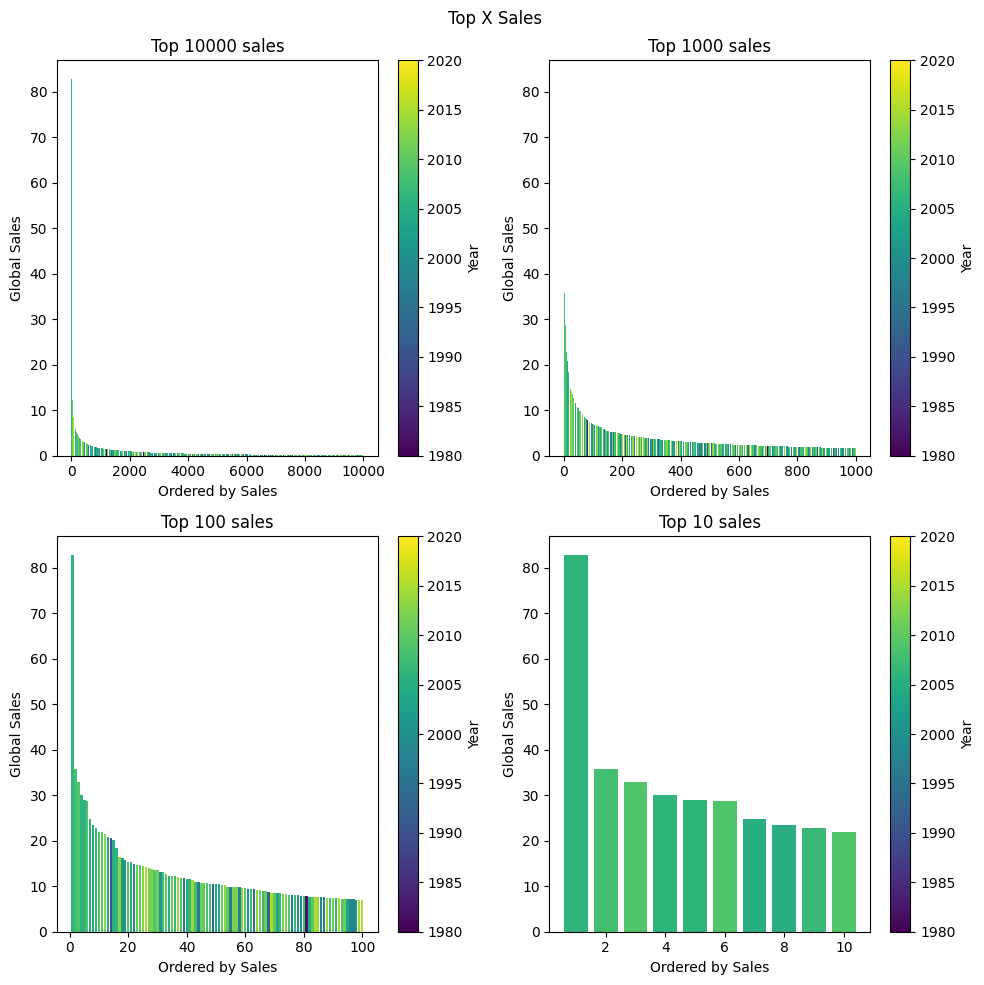

In [19]:
fig, axs = plt.subplots(figsize=(5, 5))

#Histogram
sns.histplot(data=filtered_df1["Year"], kde=True, ax = axs)



#Sales
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 10))
axs = axs.ravel()
plt.suptitle("Top X Sales")


# Normalize 'Year' data and create a colour for each year
norm = mcolors.Normalize(vmin=filtered_df1['Year'].min(), vmax=filtered_df1['Year'].max())
colormap = plt.cm.viridis
colors = colormap(norm(filtered_df1['Year']))

# Add colorbar to the figure
sm = cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])


#Top 1000 Video games
top_10000 = filtered_df1.loc[filtered_df1["Global_Rank"] <= 10000]
axs[0].bar(top_10000["Global_Rank"], top_10000["Global_Sales"], color=colors)
axs[0].set_xlabel('Ordered by Sales')
axs[0].set_ylabel('Global Sales')
axs[0].set_title('Top 10000 sales')
fig.colorbar(sm, ax=axs[0], orientation='vertical', label='Year')

#Top 1000 Video games
top_1000 = filtered_df1.loc[filtered_df1["Global_Rank"] <= 1000]
axs[1].bar(top_1000["Global_Rank"], top_1000["Global_Sales"], color=colors)
axs[1].set_xlabel('Ordered by Sales')
axs[1].set_ylabel('Global Sales')
axs[1].set_title('Top 1000 sales')
fig.colorbar(sm, ax=axs[1], orientation='vertical', label='Year')

#Top 100 Video games
top_100 = filtered_df1.loc[filtered_df1["Global_Rank"] <= 100]
axs[2].bar(top_100["Global_Rank"], top_100["Global_Sales"], color=colors)
axs[2].set_xlabel('Ordered by Sales')
axs[2].set_ylabel('Global Sales')
axs[2].set_title('Top 100 sales')
fig.colorbar(sm, ax=axs[2], orientation='vertical', label='Year')

#Top 10 Video games
top_10 = filtered_df1.loc[filtered_df1["Global_Rank"] <= 10]
axs[3].bar(top_10["Global_Rank"], top_10["Global_Sales"], color=colors)
axs[3].set_xlabel('Ordered by Sales')
axs[3].set_ylabel('Global Sales')
axs[3].set_title('Top 10 sales')
fig.colorbar(sm, ax=axs[3], orientation='vertical', label='Year')
             
plt.tight_layout()

Histogram of the year by number of video games in dataset. This shows that the number of video games peaked in the 2005 to 2015 for the consoles that the dataset looks at. The vast majoirty of the games have low sales looking at the second graphs.

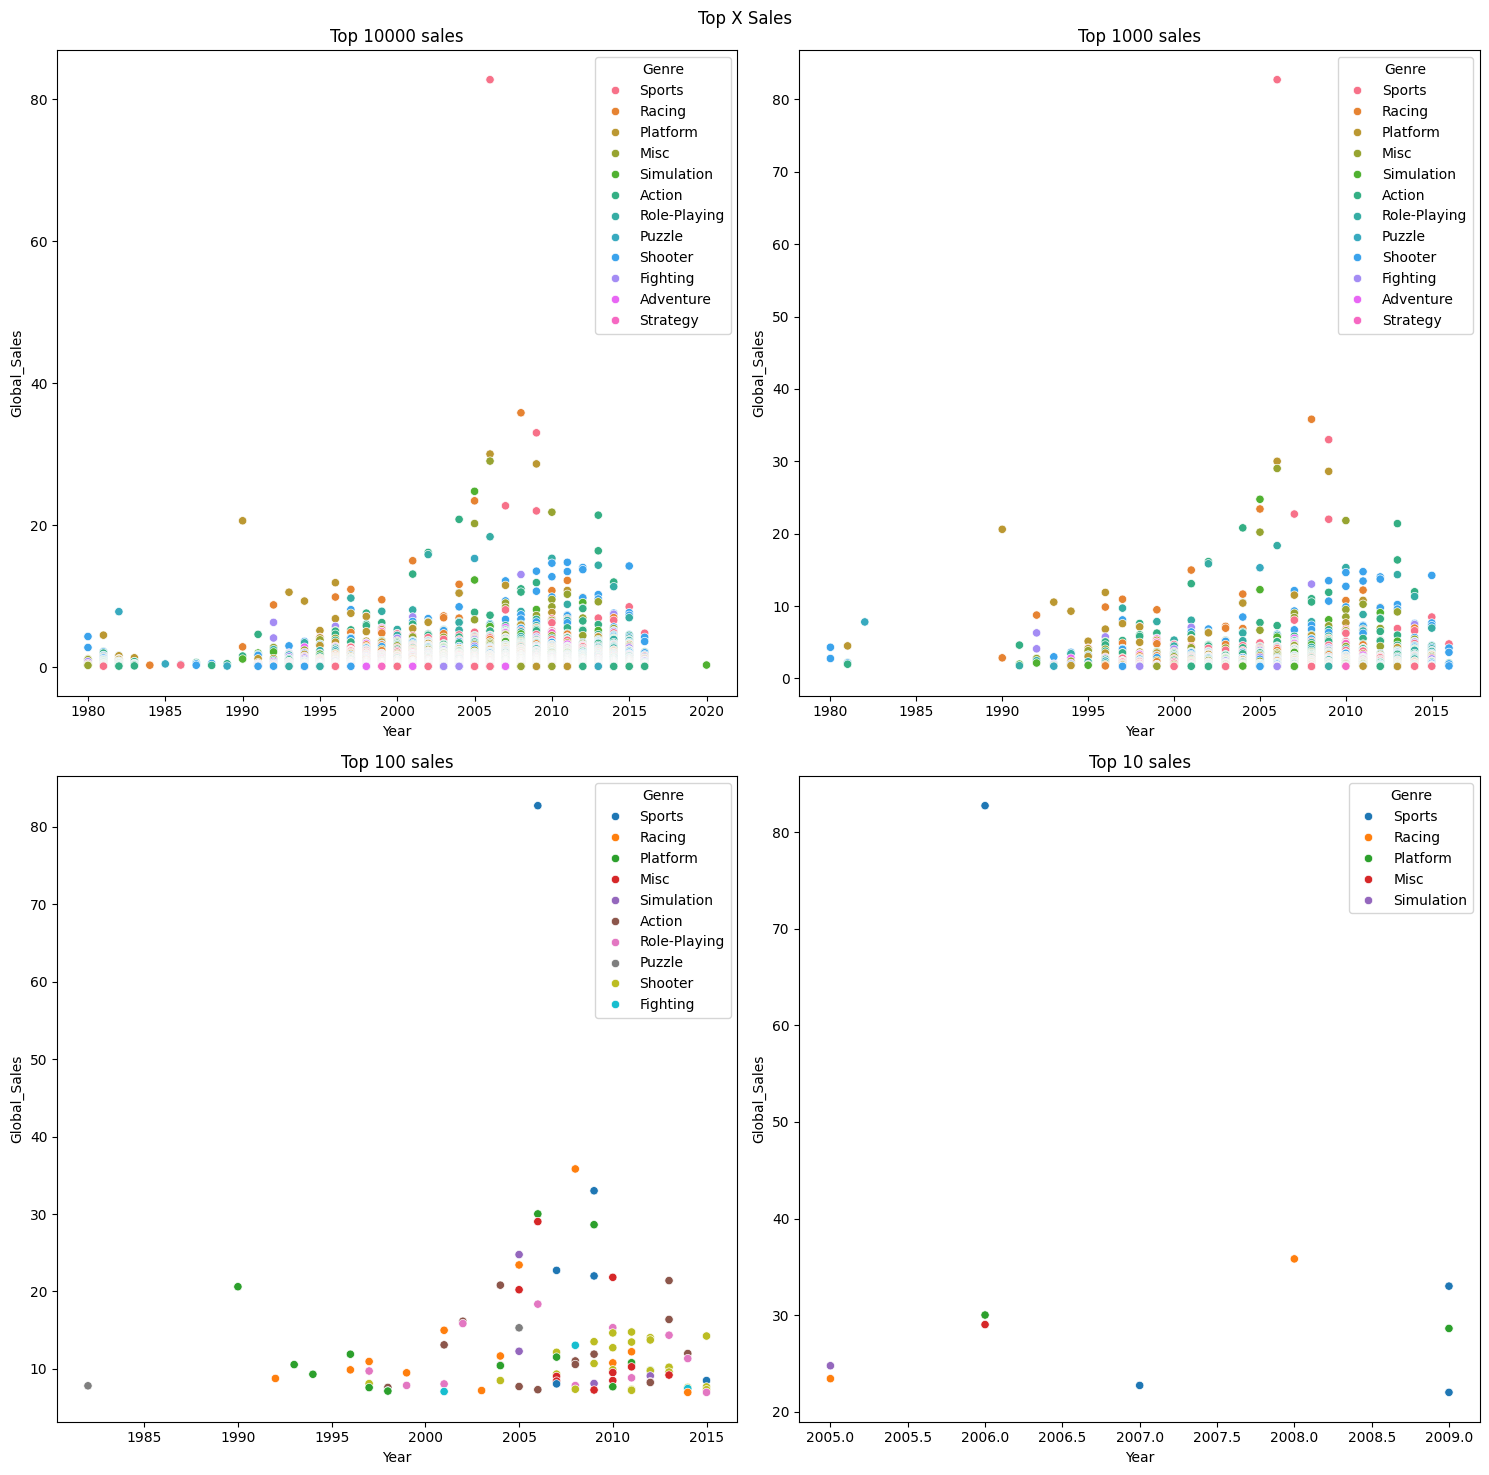

In [20]:
#Sales
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 15))
axs = axs.ravel()
plt.suptitle("Top X Sales")

#Top 1000 Video games
top_10000 = filtered_df1.loc[filtered_df1["Global_Rank"] <= 10000]
sns.scatterplot(top_10000, x = "Year", y = "Global_Sales", hue = "Genre",  ax=axs[0])
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Global_Sales')
axs[0].set_title('Top 10000 sales')

#Top 1000 Video games
top_1000 = filtered_df1.loc[filtered_df1["Global_Rank"] <= 1000]
sns.scatterplot(top_1000, x = "Year", y = "Global_Sales", hue = "Genre",  ax=axs[1])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Global_Sales')
axs[1].set_title('Top 1000 sales')

#Top 100 Video games
top_100 = filtered_df1.loc[filtered_df1["Global_Rank"] <= 100]
sns.scatterplot(top_100, x = "Year", y = "Global_Sales", hue = "Genre",  ax=axs[2])
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Global_Sales')
axs[2].set_title('Top 100 sales')

#Top 10 Video games
top_10 = filtered_df1.loc[filtered_df1["Global_Rank"] <= 10]
sns.scatterplot(top_10, x = "Year", y = "Global_Sales", hue = "Genre",  ax=axs[3])
axs[3].set_xlabel('Year')
axs[3].set_ylabel('Global_Sales')
axs[3].set_title('Top 10 sales')
             
plt.tight_layout()

Text(0.5, 1.0, 'Top 10 sales')

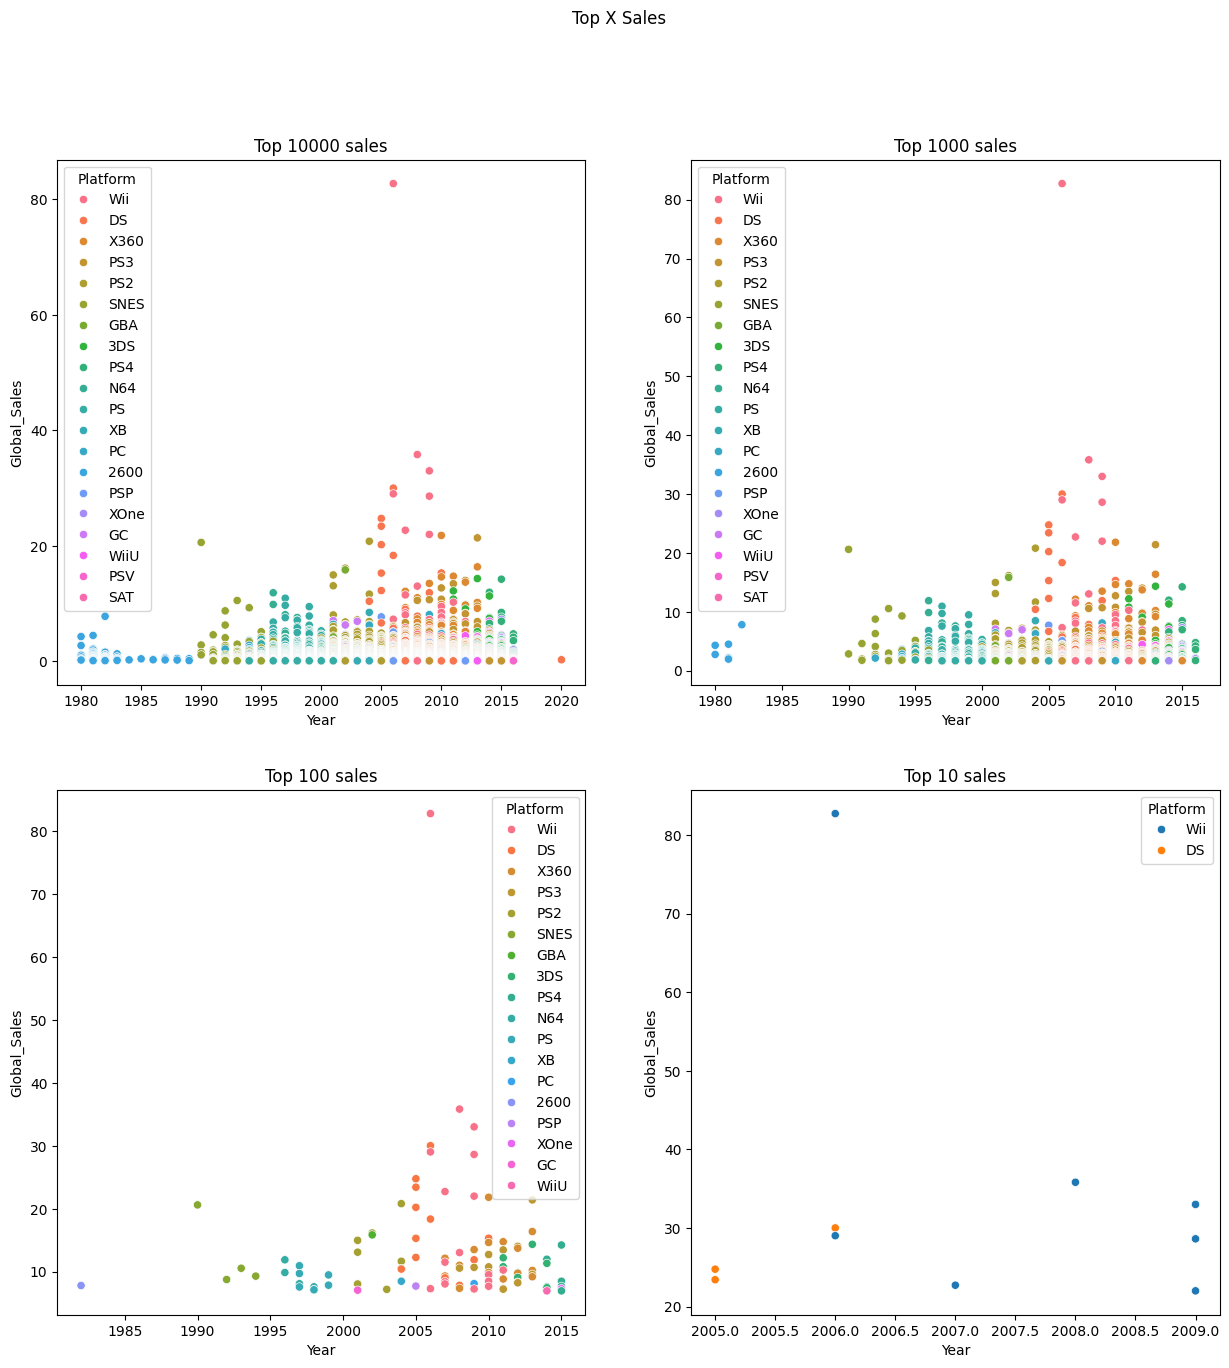

In [21]:
#Sales
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 15))
axs = axs.ravel()
plt.suptitle("Top X Sales")

#Top 1000 Video games
top_10000 = filtered_df1.loc[filtered_df1["Global_Rank"] <= 10000]
sns.scatterplot(top_10000, x = "Year", y = "Global_Sales", hue = "Platform",  ax=axs[0])
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Global_Sales')
axs[0].set_title('Top 10000 sales')

#Top 1000 Video games
top_1000 = filtered_df1.loc[filtered_df1["Global_Rank"] <= 1000]
sns.scatterplot(top_1000, x = "Year", y = "Global_Sales", hue = "Platform",  ax=axs[1])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Global_Sales')
axs[1].set_title('Top 1000 sales')

#Top 100 Video games
top_100 = filtered_df1.loc[filtered_df1["Global_Rank"] <= 100]
sns.scatterplot(top_100, x = "Year", y = "Global_Sales", hue = "Platform",  ax=axs[2])
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Global_Sales')
axs[2].set_title('Top 100 sales')

#Top 10 Video games
top_10 = filtered_df1.loc[filtered_df1["Global_Rank"] <= 10]
sns.scatterplot(top_10, x = "Year", y = "Global_Sales", hue = "Platform",  ax=axs[3])
axs[3].set_xlabel('Year')
axs[3].set_ylabel('Global_Sales')
axs[3].set_title('Top 10 sales')

### Sales by region

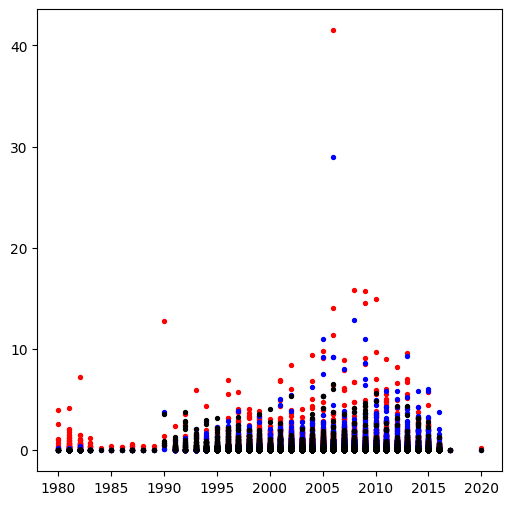

In [22]:
fig, axs = plt.subplots(figsize=(6, 6))
plt.scatter(filtered_df1["Year"], filtered_df1["NA_Sales"], c = "Red", s = 8)
plt.scatter(filtered_df1["Year"], filtered_df1["EU_Sales"], c = "Blue", s = 8)
plt.scatter(filtered_df1["Year"], filtered_df1["JP_Sales"], c = "Black", s = 8)

### Pivot table - Average regional sales for Genre

In [23]:
filtered_df1_clean_genre_pivot = filtered_df1.pivot_table(index = "Genre", columns = None, values = ["Global_Sales","NA_Sales","EU_Sales","JP_Sales"], aggfunc="mean")
filtered_df1_clean_genre_pivot

,EU_Sales,Global_Sales,JP_Sales,NA_Sales
Genre,,,,
Action,0.158168,0.521441,0.045775,0.260112
Adventure,0.047486,0.167725,0.035148,0.072099
Fighting,0.122065,0.532786,0.100025,0.266070
Misc,0.125296,0.461925,0.058673,0.233616
Platform,0.216015,0.806773,0.103998,0.428655
Puzzle,0.080574,0.321704,0.065074,0.154667
Racing,0.192824,0.585838,0.042023,0.288092
Role-Playing,0.116421,0.571614,0.208681,0.208175
Shooter,0.243444,0.779275,0.025532,0.430047


In [16]:
filtered_df1_clean_platform_pivot = filtered_df1.pivot_table(index = "Platform", columns = None, values = ["Global_Sales","NA_Sales","EU_Sales","JP_Sales"], aggfunc="mean")
filtered_df1_clean_platform_pivot

,EU_Sales,Global_Sales,JP_Sales,NA_Sales
Platform,,,,
2600,0.041897,0.746293,0.000000,0.696379
3DS,0.116814,0.493527,0.194990,0.156373
DS,0.091061,0.384284,0.082130,0.182323
GBA,0.092226,0.388830,0.059237,0.227010
GC,0.070701,0.363727,0.039373,0.243432
N64,0.129842,0.690538,0.106835,0.439589
PC,0.146429,0.271535,0.000181,0.098124
PS,0.178621,0.611766,0.117561,0.281505
PS2,0.156385,0.579906,0.064664,0.269356


Text(0, 0.5, 'Average Global Sales')

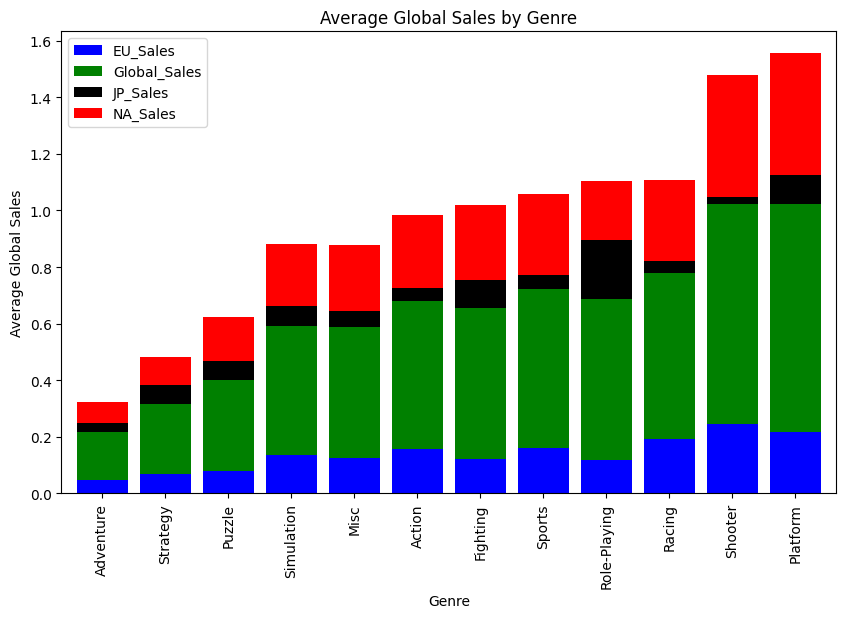

In [17]:
filtered_df1_clean_pivot = filtered_df1_clean_genre_pivot.sort_values("Global_Sales")
filtered_df1_clean_pivot.plot.bar(figsize=(10, 6), width=0.8, stacked=True, color = {"Global_Sales":"Green", "EU_Sales":"Blue", "JP_Sales":"Black", "NA_Sales":"Red"})
plt.title('Average Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Global Sales')

Text(0, 0.5, 'Average Global Sales')

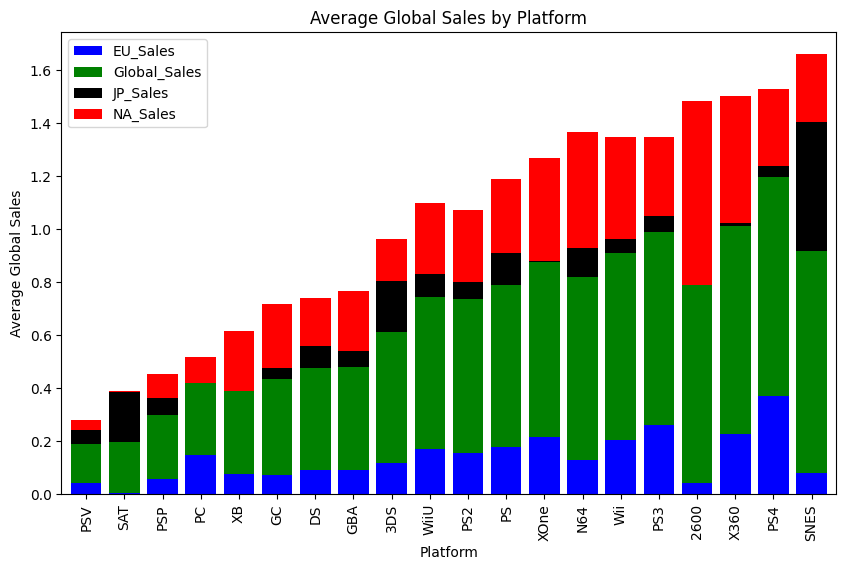

In [25]:
filtered_df1_clean_platform_pivot = filtered_df1_clean_platform_pivot.sort_values("Global_Sales")
filtered_df1_clean_platform_pivot.plot.bar(figsize=(10, 6), width=0.8, stacked=True, color = {"Global_Sales":"Green", "EU_Sales":"Blue", "JP_Sales":"Black", "NA_Sales":"Red"})
plt.title('Average Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Global Sales')